In [1]:
!pip install -U scikit-learn

You should consider upgrading via the 'c:\users\my lenovo\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import sklearn

In [3]:
sklearn.__version__

'0.24.2'

## Simple Linear Regression

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("Dataset/Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
x = data.iloc[:,[0]].values
y = data.iloc[:,1].values

In [8]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [13]:
y_train

array([101302.,  56642.,  66029.,  64445.,  61111., 113812.,  91738.,
        46205., 121872.,  60150.,  39891.,  81363.,  93940.,  57189.,
        54445., 105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred = reg.predict(x_test)
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [17]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088.])

## Ploting Best Fit Line

In [18]:
import matplotlib.pyplot as plt

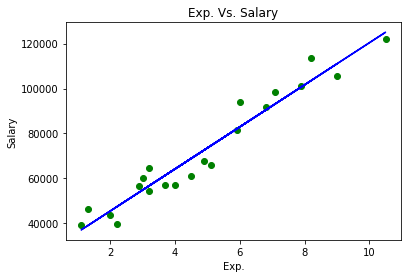

In [19]:
plt.scatter(x_train,y_train, color='green')
plt.plot(x_train,reg.predict(x_train), color="blue")
plt.title("Exp. Vs. Salary")
plt.xlabel("Exp.")
plt.ylabel("Salary")
plt.show()

In [21]:
print("Training Score:", reg.score(x_train,y_train))
print("Test Score:", reg.score(x_test,y_test))

Training Score: 0.9423777652193379
Test Score: 0.9740993407213511


In [24]:
x1 = [[10]]

out = reg.predict(x1)
print(out)

[120380.00420313]


## Multiple Linear Regression

In [25]:
import pandas as pd

In [26]:
data = pd.read_csv("Dataset/taxi.csv")
data.head()

,Priceperweek,Population,Monthlyincome,Averageparkingpermonth,Numberofweeklyriders
0,15,1800000,5800,50,192000
1,15,1790000,6200,50,190400
2,15,1780000,6400,60,191200
3,25,1778000,6500,60,177600
4,25,1750000,6550,60,176800


In [27]:
data_x = data.iloc[:,0:-1].values
data_y = data.iloc[:,-1].values

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test =  train_test_split(data_x,data_y,test_size=0.3,random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred = regressor.predict(x_test)
y_pred

array([188629.50339543, 136559.39301861, 167923.33044203, 126048.35876704,
       178953.09696641, 166223.49873765, 130975.62779069, 167971.3136973 ,
       141866.03727522])

In [34]:
y_test

array([191200, 126080, 160800, 115696, 178400, 163200, 123888, 161600,
       150400], dtype=int64)

In [36]:
print(regressor.coef_)
print(regressor.intercept_)

[-5.68775893e+02  1.30158909e-01 -5.49376209e-02  1.22759763e+02]
-41535.70104645021


In [41]:
# y = b0 + b1*x1 + b2*x2 + b3*x3+ .......+ bn*Xn
yout0 = regressor.intercept_ + regressor.coef_[0]*x_test[0][0] + regressor.coef_[1]*x_test[0][1] + regressor.coef_[2]*x_test[0][2] + regressor.coef_[3]*x_test[0][3]
yout1 = regressor.intercept_ + regressor.coef_[0]*x_test[1][0] + regressor.coef_[1]*x_test[1][1] + regressor.coef_[2]*x_test[1][2] + regressor.coef_[3]*x_test[1][3]
yout1

136559.39301861406

In [42]:
x1 = [[15, 1800000, 5800, 50]]

out1 = regressor.predict(x1)
out1

array([190038.04651918])

In [43]:
print("Training, Score : ", regressor.score(x_train,y_train))
print("Testing Score : ", regressor.score(x_test, y_test))

Training, Score :  0.9428364724316813
Testing Score :  0.9157379222488221


## KNN

In [44]:
import pandas as pd

In [45]:
df = pd.read_csv("Dataset/Facebook_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [46]:
len(df)

400

In [49]:
data_x = df.iloc[:,[2,3]].values
data_y = df.iloc[:,4].values

In [50]:
data_x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [51]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.25, random_state=0)

In [54]:
len(x_test)

100

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [58]:
x_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
cls = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
cls.fit(x_train, y_train)

KNeighborsClassifier()

In [61]:
y_pred = cls.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [62]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
print(accuracy_score(y_test,y_pred)*100)

93.0
